# 6COM1044 - Data Classification Coursework
- Marcelo Pedroza Hernandez
- UH Student ID: 23033126
- April 10, 2024

In [132]:
#Used Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Task 1 - Data Exploration (20 marks)
- In this task, you need to use Principal Component Analysis (PCA) to understand the characteristics of the datasets.

In [133]:
# Task 1 - (a)

# Load the training and test datasets
train_df = pd.read_csv("../mlnc_DATA/wdbc_training.csv")
test_df = pd.read_csv("../mlnc_DATA/wdbc_test.csv")

# Save the 30 features and the labels in separate variables for both datasets
y_train_I = train_df.iloc[:, 1]
X_train_I = train_df.iloc[:, 2:32]
y_test = test_df.iloc[:, 1]
X_test = test_df.iloc[:, 2:32]

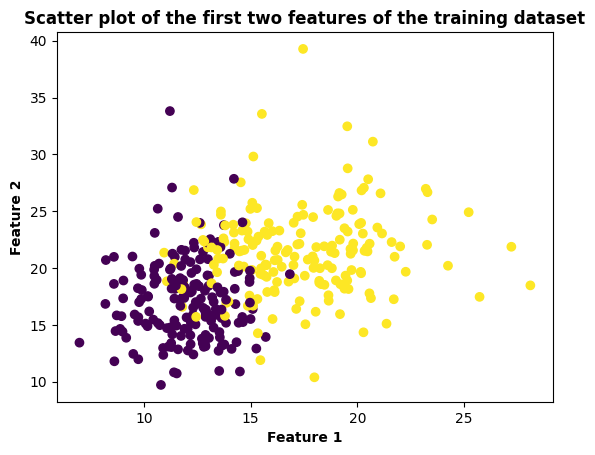

In [134]:
# Task 1 - (b)

# Show a scatter plot of the first two features of the training dataset
plt.scatter(X_train_I.iloc[:, 0], X_train_I.iloc[:, 1], c=y_train_I)
plt.xlabel('Feature 1', fontweight='bold')
plt.ylabel('Feature 2', fontweight='bold')
plt.title('Scatter plot of the first two features of the training dataset', fontweight='bold')
plt.show()

In [143]:
# Task 1 - (c)

# Normalise the training (I) and test datasets
X_train_I_norm = StandardScaler().fit_transform(X_train_I)
X_test_norm = StandardScaler().fit_transform(X_test)

# Report the mean and standard deviation for the first feature in the normalised test set
mean_test_norm_feature1 = np.mean(X_test_norm[:, 0])
print("Mean of the first feature in the normalised test set: ", mean_test_norm_feature1)  # Near 0 = OK
std_test_norm_feature1 = np.std(X_test_norm[:, 0])
print("Standard deviation of the first feature in the normalised test set: ", std_test_norm_feature1)  # Near 1 = OK

Mean of the first feature in the normalized test set:  -5.312071888158644e-17
Standard deviation of the first feature in the normalized test set:  0.9999999999999999


In [136]:
# Task 1 - (d)

# Perform a PCA analysis on the scaled training set (I)
pca = PCA()
projections = pca.fit_transform(X_train_I_norm)  # The projections matrix represents the eigenvectors of the covariance matrix
print(f"PCA Projections Shape: {projections.shape}")  # Confirm the shape of the projections matrix matches the number of features

# Report how much variance has been captured in the PCA analysis
variance_ratios = pca.explained_variance_ratio_
print(f"\nVariance Captured by each PCA component:\n {variance_ratios}")  # Order of variance ratios is the order of the PCA components
variance_ratio_sum = np.sum(variance_ratios)  # Confirm the sum of the variance ratios is 1
print(f"\nSum of Variance Captured by PCA components: {variance_ratio_sum}")


PCA Projections Shape: (360, 30)

Variance Captured by each PCA component:
 [4.43606862e-01 1.91824039e-01 1.02551948e-01 5.85787475e-02
 4.96835548e-02 3.98816657e-02 2.25912562e-02 1.63373291e-02
 1.40936045e-02 1.14164312e-02 1.06760893e-02 9.00097065e-03
 7.86088289e-03 5.15507021e-03 3.23654164e-03 2.62141466e-03
 2.10410383e-03 1.92452722e-03 1.44303536e-03 1.12628084e-03
 9.75993691e-04 9.19406503e-04 6.95175730e-04 6.03693626e-04
 5.23470504e-04 2.52293483e-04 2.27284914e-04 5.53799241e-05
 2.83129826e-05 4.63331178e-06]

Sum of Variance Captured by PCA components: 0.9999999999999998


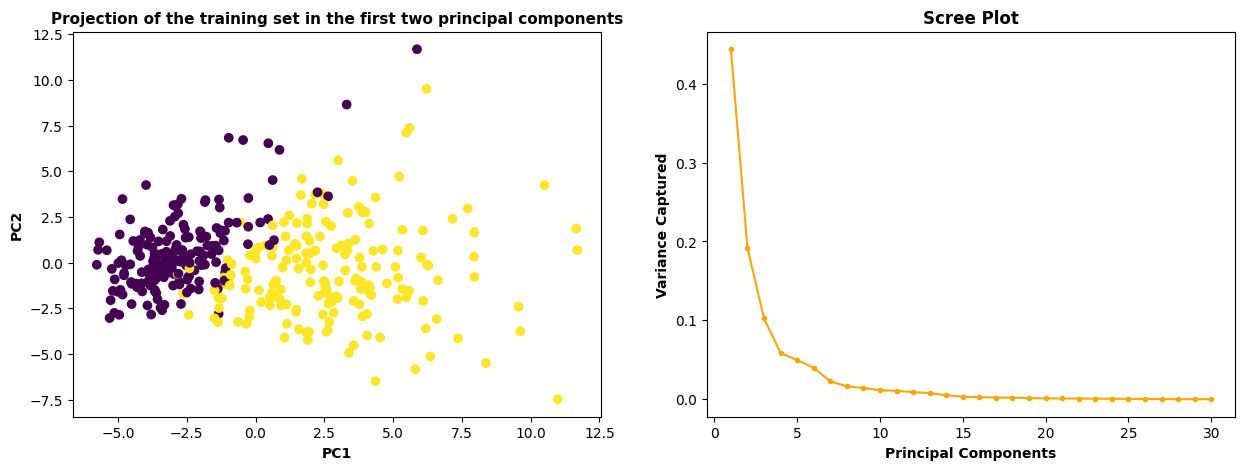

In [137]:
# Task 1 - (d) Plots

# Create a figure with two subplots
figure1, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a scatter plot of the projections of the training set (I) in the first two principal components
ax[0].scatter(projections[:, 0], projections[:, 1], c=y_train_I) 
ax[0].set_xlabel('PC1', fontweight='bold')
ax[0].set_ylabel('PC2', fontweight='bold')
ax[0].set_title('Projection of the training set in the first two principal components', fontweight='bold', fontsize=11)

# Create a scree plot of the variance captured by each principal component
ax[1].plot(range(1, 31), variance_ratios, marker='.', color='orange') 
ax[1].set_xlabel('Principal Components', fontweight='bold')
ax[1].set_ylabel('Variance Captured', fontweight='bold')
ax[1].set_title('Scree Plot', fontweight='bold')
 
plt.show()
figure1.savefig('Task1_D_Plots.png')

### Task 2 - Data Preparation (5 marks)
- In this task, you need to divide the training dataset into a smaller training set and a validation set, and normalise the data.

In [138]:
# Task 2 - (a)

# Divide the training set using 30% as the validation set, randomly selecting the points
X_train_II, X_val, y_train_II, y_val = train_test_split(X_train_I, y_train_I, test_size=0.3, random_state=42)  # 42 is the answer to everything :)

# Report the number of points in each set
print(f"Number of points in the smaller training set: {X_train_II.shape[0]}")
print(f"Number of points in the validation set: {X_val.shape[0]}")

Number of points in the smaller training set: 252
Number of points in the validation set: 108


In [139]:
# Task 2 - (b)

# Normalise the smaller training set (II)
X_train_II_norm = StandardScaler().fit_transform(X_train_II)

# Normalise the validation set
X_val_norm = StandardScaler().fit_transform(X_val)

# Report the mean and standard deviation for all features in the normalised smaller training set (II)
mean_train_II_norm_all_features = np.mean(X_train_II_norm, axis=0)
print(f"\nMean of the features in the normalised smaller training set:\n {mean_train_II_norm_all_features}")  # Near 0 = OK
std_train_II_norm_all_features = np.std(X_train_II_norm, axis=0)
print(f"Standard Deviation of the features in the normalised smaller training set:\n {std_train_II_norm_all_features}")  # Near 1 (unit std) = OK

# Report the mean and standard deviation for all features in the normalised validation set 
mean_val_norm_all_features = np.mean(X_val_norm, axis=0)
print(f"\nMean of the features in the normalised validation set:\n {mean_val_norm_all_features}")  # Near 0 = OK
std_val_norm_all_features = np.std(X_val_norm, axis=0)
print(f"Standard Deviation of the features in the normalised validation set:\n {std_val_norm_all_features}")  # Near 1 (unit std) = OK


Mean of the features in the normalised smaller training set:
 [-9.86864911e-17  4.88145679e-16 -1.26882631e-16  0.00000000e+00
  1.38161088e-15  5.63922806e-17 -9.86864911e-17 -7.04903508e-17
  3.59500789e-16  7.16358190e-16  1.40980702e-17 -4.22942105e-17
 -1.12784561e-16 -8.45884209e-17 -1.81512653e-16 -5.28677631e-17
  9.86864911e-17 -1.40980702e-17 -5.63922806e-17  4.22942105e-17
 -2.53765263e-16  4.58187280e-17  0.00000000e+00 -4.22942105e-17
 -3.10157543e-16  6.34413157e-17  0.00000000e+00  7.04903508e-17
  1.79750394e-16  3.01346250e-16]
Standard Deviation of the features in the normalised smaller training set:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

Mean of the features in the normalised validation set:
 [ 2.77555756e-16  3.80354184e-17 -8.30611300e-16  2.79611725e-16
 -3.17647143e-16 -4.61564943e-16 -9.09766090e-17  9.97144754e-17
 -3.38720821e-16  3.49514656e-16 -1.60365548e-16 -3.80354184e-16
 -4.72872770e-16  2.0559685

### Task 3 - SVM Classification (12 marks)
- In this task, you need to build a support vector classifier using SVC from sklearn library.

In [140]:
# Task 3 - (a) Linear Kernel with C in [2, 52]

# Evaluate performance using a linear kernel with three different C values
print("\nClassification Reports for Linear Kernel with Different C Values on smaller training set (II) and validation set:")

# Smallest C value
svc1_lin = SVC(kernel='linear', C=2)  
model1_lin = svc1_lin.fit(X_train_II_norm, y_train_II)
y_pred1_lin = model1_lin.predict(X_val_norm)
print(f"Classification Report for C=2:\n{classification_report(y_val, y_pred1_lin)}")

# Middle C value
svc2_lin = SVC(kernel='linear', C=12)  
model2_lin = svc2_lin.fit(X_train_II_norm, y_train_II)
y_pred2_lin = model2_lin.predict(X_val_norm)
print(f"Classification Report for C=27:\n{classification_report(y_val, y_pred2_lin)}")

# Largest C value
svc3_lin = SVC(kernel='linear', C=52)
model3_lin = svc3_lin.fit(X_train_II_norm, y_train_II)
y_pred3_lin = model3_lin.predict(X_val_norm)
print(f"Classification Report for C=52:\n{classification_report(y_val, y_pred3_lin)}")


Classification Reports for Linear Kernel with Different C Values:
Classification Report for C=2:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        54
           4       0.96      0.96      0.96        54

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.96      0.96      0.96       108

Classification Report for C=27:
              precision    recall  f1-score   support

           2       0.94      0.93      0.93        54
           4       0.93      0.94      0.94        54

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108

Classification Report for C=52:
              precision    recall  f1-score   support

           2       0.94      0.93      0.93        54
           4       0.93      0.94      0.94        54

    accuracy        

In [141]:
# Task 3 - (a) RBF Kernel with C in [2, 52] and gamma in [0.01, 12]

# Evaluate performance using an RBF kernel with three different C and gamma values
print("\nClassification Reports for RBF Kernel with Different C and Gamma Values:")

# Smallest C and gamma values
svm1_rbf = SVC(kernel='rbf', C=2, gamma=0.01)
model1_rbf = svm1_rbf.fit(X_train_II_norm, y_train_II)
y_pred1_rbf = model1_rbf.predict(X_val_norm)
print(f"Classification Report for C=2 and gamma=0.01:\n{classification_report(y_val, y_pred1_rbf)}")

# Geometric means of the C and gamma values
svm2_rbf = SVC(kernel='rbf', C=12, gamma=0.35)  
model2_rbf = svm2_rbf.fit(X_train_II_norm, y_train_II)
y_pred2_rbf = model2_rbf.predict(X_val_norm)
print(f"Classification Report for C=12 and gamma=0.35:\n{classification_report(y_val, y_pred2_rbf)}")

# Largest C and gamma values
svm3_rbf = SVC(kernel='rbf', C=52, gamma=12)  
model3_rbf = svm3_rbf.fit(X_train_II_norm, y_train_II)
y_pred3_rbf = model3_rbf.predict(X_val_norm)
print(f"Classification Report for C=52 and gamma=12:\n{classification_report(y_val, y_pred3_rbf)}")


Classification Reports for RBF Kernel with Different C and Gamma Values:
Classification Report for C=2 and gamma=0.01:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        54
           4       0.96      0.96      0.96        54

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.96      0.96      0.96       108

Classification Report for C=12 and gamma=0.35:
              precision    recall  f1-score   support

           2       0.96      0.87      0.91        54
           4       0.88      0.96      0.92        54

    accuracy                           0.92       108
   macro avg       0.92      0.92      0.92       108
weighted avg       0.92      0.92      0.92       108

Classification Report for C=52 and gamma=12:
              precision    recall  f1-score   support

           2       1.00      0.06      0.11        54
           4       0.51  

In [142]:
# Task 3 - (c) Further Evaluation of the Best-Performing Model from Task 3 - (a)

# Evaluate the best-performing model on the whole normalised training set
svm_best = SVC(kernel='rbf', C=2, gamma=0.01) # Best C and gamma values from Task 3 (a)
model_best = svm_best.fit(X_train_I_norm, y_train_I)
y_pred_best = model_best.predict(X_train_I_norm)
print(f"Classification Report for the best-performing model:\n{classification_report(y_train_I, y_pred_best)}")

Classification Report for the best-performing model:
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       180
           4       0.98      0.98      0.98       180

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

